In [ ]:
# Agenda : AR Model , FT , FFT , static FFT , Algorithm modelling , Welch's Method

In [ ]:
# Framework : 1. why FT? pragmatic approach?

In [ ]:
#AR (auto - regressive) way simulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch,spectrogram

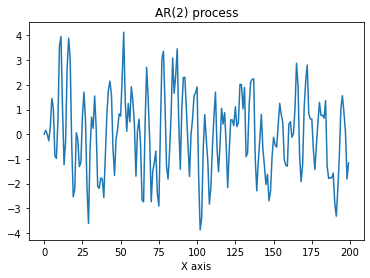

In [ ]:
alpha = np.array([-0.6,0.9])
k = len(alpha)
N=200
x = np.zeros(N)

for i in range(k,N):
   x[i] = sum(alpha*x[i-k:i]) + np.random.randn()


x += np.sin(np.linspace(0,10*np.pi,N))

plt.plot(x)
plt.xlabel('X axis')
plt.title('AR(%s) process'%k)
plt.show()

In [ ]:
#code for Fourier Transform

#define our time vector
t= np.arange(N)/N
#initialize Fourier coefficients
fc = np.zeros(N,dtype=complex)
#Manual Fourier Transform

for f in range(N):
  #1) creating the complex sine wave(csw)
  csw = np.exp(-1j*2*np.pi*f*t)

  #2) dot product with the signal
  fc[f] = np.dot(csw,x)

  #FFT function implementation

  fc2 = np.fft.fft(x)

In [ ]:
fc

array([ 7.67893630e+00+0.00000000e+00j, -7.60687129e+00-9.89830314e+00j,
        1.63966493e-01+5.20839231e+00j,  6.07012330e+00-8.74902113e+00j,
       -1.19783239e+01-1.16162031e+01j,  6.95770282e+00-1.00277464e+02j,
       -1.93893454e+01+1.09007008e+01j,  6.78957636e+00+5.12797462e-01j,
       -4.35182025e+00-2.22528587e+01j,  1.45387656e+01-5.31177399e+00j,
       -1.03942566e+01+2.27287196e+01j, -3.90249980e+00+9.12986417e+00j,
        1.84497010e+01+1.91495253e+01j,  7.54169034e+00+1.50560929e+01j,
        1.54019727e+01+3.51539088e+01j, -5.36261865e+00-1.22663231e+00j,
       -4.92799764e+00-1.36564798e+01j, -2.55009887e+01+2.04459029e+01j,
        9.92336946e-01+1.73922725e+01j, -2.36167962e+01-2.86817298e+01j,
       -2.56220670e+01-1.46821875e+01j,  4.66675542e-02-4.16419754e+01j,
       -1.42748410e+01+2.95740816e+01j,  1.86662723e+01+4.51069193e+01j,
        2.46119774e+01-2.14884592e+01j, -1.96499614e+01-2.33901519e+01j,
       -9.75765649e+00-1.05487468e+01j, -3.30353577

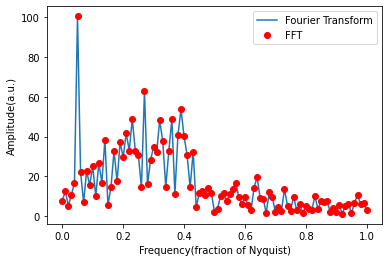

In [ ]:
hz = np.linspace(0,1,int(N/2+1))

plt.plot(hz,np.abs(fc[:len(hz)]),label='Fourier Transform')
plt.plot(hz,np.abs(fc2[:len(hz)]),'ro',label='FFT')
plt.legend()
plt.xlabel('Frequency(fraction of Nyquist)')
plt.ylabel('Amplitude(a.u.)')
plt.show()

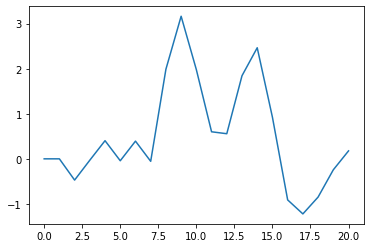

In [ ]:
#Zero padding of the FFT (for smoothening the frequency spectrum)

alpha = np.array([-0.6,0.9])
k = len(alpha)
N=21
x = np.zeros(N)

for i in range(k,N):
   x[i] = sum(alpha*x[i-k:i]) + np.random.randn()

plt.plot(x)

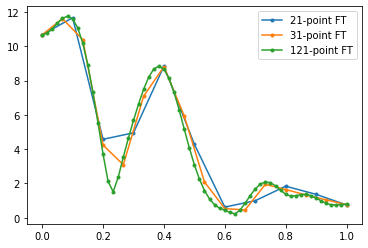

In [ ]:

for i in range(3):
  #specify the number of FFT points (including zero padding)
  nfft = N + 10**i* int(i!=0)                  # [1,10,100]
  #computation of FFT
  x_X = np.fft.fft(x,n=nfft)
  #computation of hz vector
  hz = np.linspace(0,1,int(nfft/2+1))

  # plot the amplitude spectrum
  plt.plot(hz,np.abs(x_X[:len(hz)]),'.-',label='%s-point FT'%nfft)
plt.legend()
plt.show()

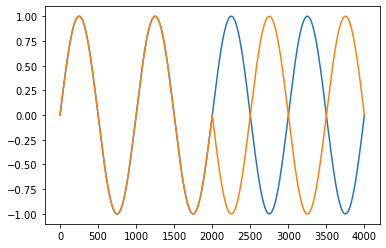

In [ ]:
#Welch's Method*********

N = 2000
t = np.linspace(0,4*np.pi,N)

signal1 = np.concatenate((np.sin(t),np.sin(t)))
signal2 = np.concatenate((np.sin(t),-np.sin(t)))

plt.plot(signal1)
plt.plot(signal2)
plt.show()                # have to think later about this plot


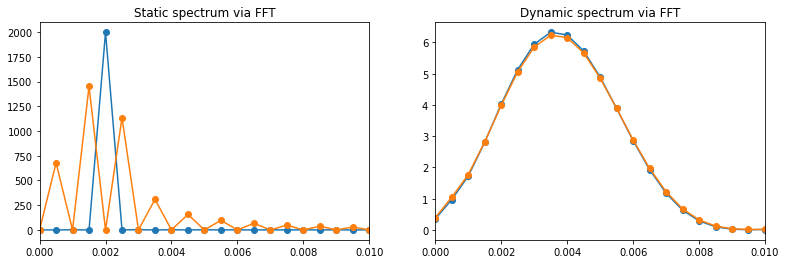

In [ ]:
#"Static FFT "

staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)
staticHz = np.linspace(0,1,int(len(signal1)/2+1))

#Welch's Method
dynamicHz,dynamicX1 = welch(signal1,nfft=N,)
dynamicHz,dynamicX2 = welch(signal2,nfft=N,)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(staticHz,np.abs(staticX1[:len(staticHz)]),'-o',label ='Signal 1')
ax[0].plot(staticHz,np.abs(staticX2[:len(staticHz)]),'-o',label ='Signal 2')
ax[0].set_xlim([0,0.01])
ax[0].set_title('Static spectrum via FFT')

ax[1].plot(dynamicHz,np.abs(dynamicX1[:len(dynamicHz)]),'-o',label ='Signal 1')
ax[1].plot(dynamicHz,np.abs(dynamicX2[:len(dynamicHz)]),'-o',label ='Signal 2')
ax[1].set_xlim([0,0.01])
ax[1].set_title('Dynamic spectrum via FFT')


plt.show()

In [ ]:
o = welch(signal1,nfft=N,)
o

(array([0.    , 0.0005, 0.001 , ..., 0.499 , 0.4995, 0.5   ]),
 array([3.50526740e-01, 9.69305498e-01, 1.72076066e+00, ...,
        3.90338803e-09, 3.90339368e-09, 1.95169990e-09]))

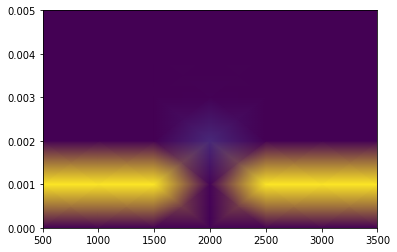

In [ ]:
#Spectrogram Analysis (Time frequency analysis)

f,t,Sxx = spectrogram(signal2,noverlap=500,nperseg=1000)
plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylim([0,0.005])
plt.show()

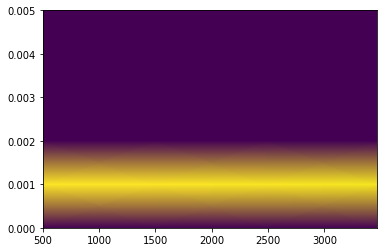

In [ ]:
f,t,Sxx = spectrogram(signal2,noverlap=10,nperseg=1000)
plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylim([0,0.005])
plt.show()

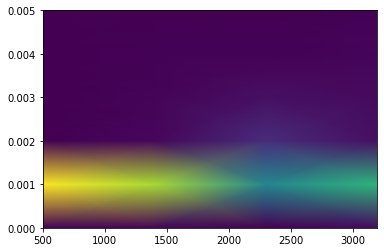

In [ ]:
f,t,Sxx = spectrogram(signal2,noverlap=100,nperseg=1000)
plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylim([0,0.005])
plt.show()

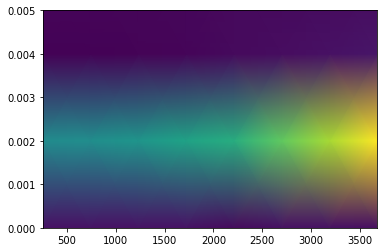

In [ ]:
f,t,Sxx = spectrogram(signal2,noverlap=10,nperseg=500)
plt.pcolormesh(t,f,Sxx,shading='gouraud')
plt.ylim([0,0.005])
plt.show()